In [1]:
library(dplyr)
library(tidyverse)
library(broom)
library(repr)
library(ggplot2)
library(httr)
library(jsonlite)
library(MASS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




### (1) Data Description 
_(2 or 3 sentences and no more than 1 table)_

_Provide a brief description of the dataset assigned to your group. Note that the dataset will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. Regardless of which variables you plan to use, provide a full descriptive summary of the dataset._

_You may want to use a table or bullet points to describe the variables in the dataset. At a minimum, you should include information on:_

- _number of observations_
- _number of variables_
- _name and type of variables_

_IMPORTANT: if known, indicate how the data has been collected. In all cases, include the data source and citation as requested by the owner(s)_


<font color="darkblue">
This data set consists of data that has been collected from a (popular) restaurant over a specified period. The duration of said period is unknown and no collection methodology was provided. The data set has:
* 244 observations (i.e. unique transactions)
* 7 variables:

| Variable name | What it represents | Type of variable |
|---------------|--------------------|------------------|
| total_bill | bill amount | float |
| tip | tip given | float |
| sex | the gender of the person paying | str |
| smoker | smoking preference | bool |
| day | day of the week | str |
| time | time of day | str |
| size | the size of the dining party | int |

* Number of observations for each categorical variable:
    * Sex:
        * Female - 87
        * Male - 157
    * Smoker:
        * Non-smoker - 151
        * Smoker - 93
    * Day:
        * Thur - 62
        * Fri - 19
        * Sat - 87
        * Sun - 76
    * Time:
        * Dinner - 176
        * Lunch - 68
    * Size:
        * 1 - 4
        * 2 - 156
        * 3 - 38
        * 4 - 37
        * 5 - 5
        * 6 - 4


It does not contain any missing data. The data source is: https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset/data. 

</font>

### (2) Question 
_(2 or 3 sentences)_

_a) Clearly state the question you want try to answer using the dataset. Your question should involve one random variable of interest (the response) and more than one explanatory variables in the dataset._

_IMPORTANT: if you have been assigned a Poisson model, then your question should be such that it can be answered with a Poisson model._

_b) Explain whether your question is focused on prediction, inference, or both._

_NOTE: It is fine to have the same question as other group members but each member must have their own explanation. Again, you don’t need to agree on a unique common question for now. In fact, usually many questions can be answered with the same dataset._


<font color="darkblue">
(updated)

a) Which set of input variables available in the tips dataset best explain the variation in the amount of tips?

b) My question is focused on inference as it aims to find out information about the unknown relationships between the response variable, tips given and the 6 explanatory variables, sex, smoking preference, total bill, day, time and size of party. It seeks to find out which of these input variables have the most significant associations with the response variable.
</font>

### (3) Exploratory Data Analysis and Visualization 
_(no more than one plot per student)_

_In this part, you will write a reproducible code to:_

1) _Demonstrate that the dataset can be loaded into R._
2) _Clean and wrangle your data into a tidy format._
3) _Propose a visualization that you consider relevant to address your question or to explore the data.
propose a high-quality, creative plot (you are allowed to use facets to explore a plot according to values of another variable)_
4) _explain why you consider this plot relevant to address your question or to explore the data_

_NOTE: this visualization does not have to illustrate the results of a methodology. Instead, you are exploring which variables are relevant, potential problems that you anticipate encountering, groups in the observations, etc. Be creative and ambitious with your plot! Try to explore at least 3 variables at once!!_

_IMPORTANT: you are not allowed to use pairs() for this assignment. Push yourself to create a more informative visualization!_

In [2]:
raw_data <- GET("https://www.kaggle.com/api/v1/datasets/download/saurabhbadole/restaurant-tips-dataset", authenticate("jxhere", "d844dceebd890c47a1a5daf3f0d78d91", type = "basic"))

temp <- tempfile()
download.file(raw_data$url,temp)
tips_data <- read.csv(unz(temp, "tips.csv"))
unlink(temp)

head(tips_data)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


In [3]:
tips_arranged <- tips_data |>
    mutate(sex = factor(sex),
          smoker = factor(ifelse(smoker == "Yes", "Smoker", "Non-smoker")),
          day = factor(day),
          time = factor(time)) |>
    group_by(size) |>
    summarise(total_bill, tip, sex, smoker, day)
head(tips_arranged)
nrow(tips_arranged)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'size'. You can override using the
`.groups` argument.


size,total_bill,tip,sex,smoker,day
<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,3.07,1.00,Female,Smoker,Sat
1,10.07,1.83,Female,Non-smoker,Thur
1,7.25,1.00,Female,Non-smoker,Sat
1,8.58,1.92,Male,Smoker,Fri
2,16.99,1.01,Female,Non-smoker,Sun
2,23.68,3.31,Male,Non-smoker,Sun


[1] 244

`geom_smooth()` using formula = 'y ~ x'


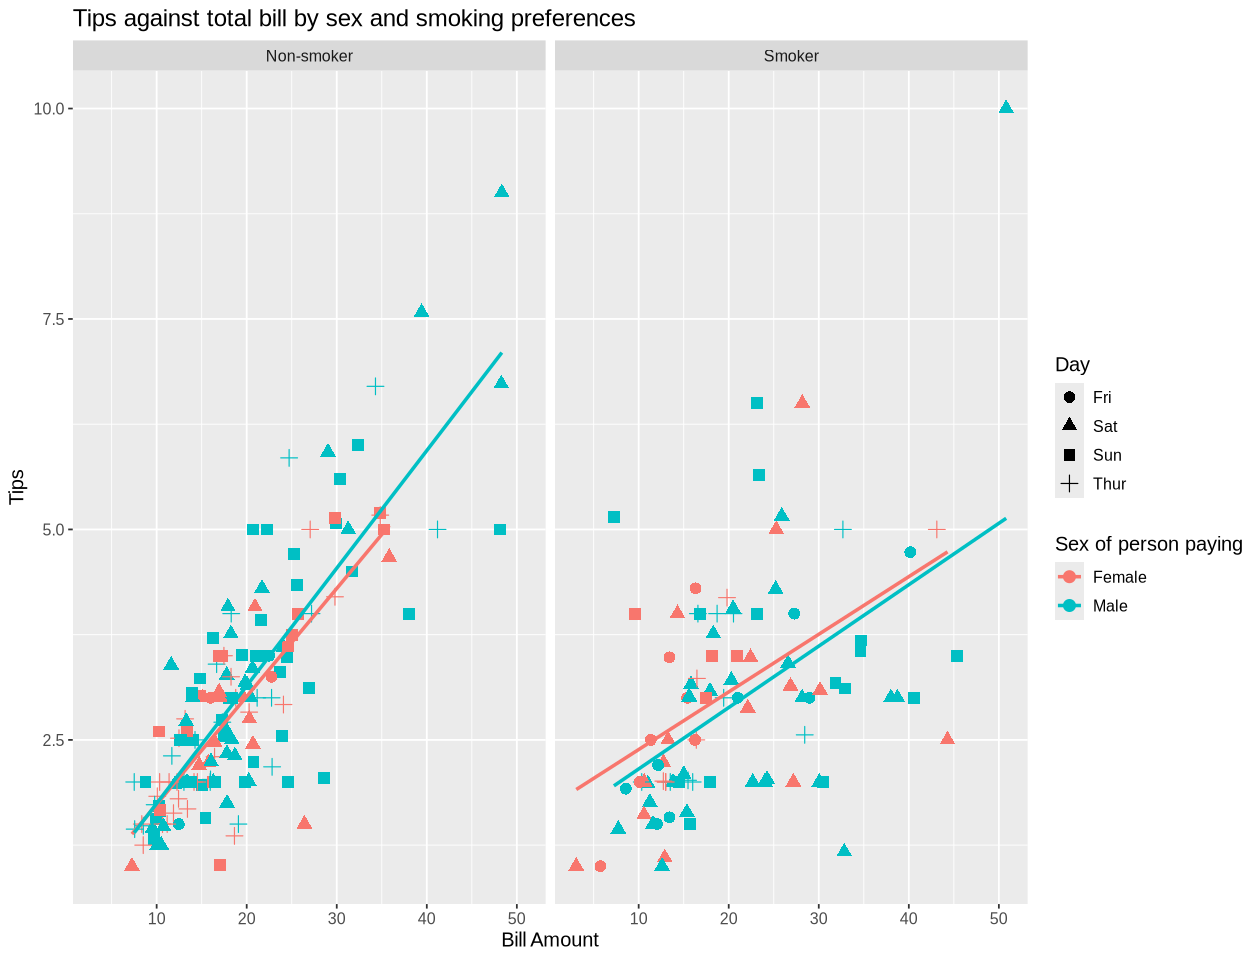

In [4]:
options(repr.plot.width = 10.5, repr.plot.height = 8)

tips_plot <- tips_arranged |> 
    ggplot() +
    geom_point(aes(x = total_bill, y = tip, colour = sex, shape = day), size = 3) + 
    geom_smooth(method = "lm", aes(x = total_bill, y = tip, colour = sex), se = FALSE, linetype = "solid") +
    facet_wrap(tips_arranged$smoker) +
    labs(x = "Bill Amount", y = "Tips", 
         colour = "Sex of person paying",
         shape = "Day",
         title = "Tips against total bill by sex and smoking preferences") +
    theme(text = element_text(size = 12))

tips_plot

<font color="darkblue">

Explanation:

From this plot, we can get a preliminary sensing of the relationship between 5 variables. From the above plot, we can see that the day of the week does not seem to have much correlation to the amount of tips paid as the various shapes representing each day are quite evenly distributed along the lines and in the case of smokers, quite spread out. Plotting this plot with the time variable instead of day yields a similar result. 

The patterns depicted in the plot are better explained by the sex of the person paying. After accounting for smoking and day, there is a difference in the gradients of the red and blue best fit lines that represent female and male respectively. This shows that the increase in tips relative to the increase in bill amounts differ for females and males (albeit in different ways for smokers and non-smokers). However, the deviations are also not exceptionally large and need further analysis to determine their significance. 

Looking at whether or not the person smokes shows a larger deviation in the lines. From the plot, the increase in the amount of tips compared to bill amounts for both female and male, regardless of day is greater for non-smokers as compared to smokers.

Lastly, there is an evident positive relationship between the total bill and the amount of tips given regardless of the other 3 variables. However, the strength of this relationship requires further analysis to determine.

Hence, this plot was relevant in exploring the data and getting an idea of what the answers to my question may be. Further analysis will be done to compare and find out the associations between all the variables in greater detail.
</font>

### (4) Methods and Plan
*Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Just a high-level thinking of what model you are planning to use.*

*In your explanation, respond to the following questions:*

- *Why is this method appropriate?*
- *Which assumptions are required, if any, to apply the method selected?*
- *What are the potential limitations or weaknesses of the method selected?*


*Note 1: you can relax/expand your question(s) from assignment 1, just change them in the corresponding section from previous assignment.*

<font color="darkblue">

##### Method: 
Firstly, I will split the data 70%-30% to create a training set and selection set. Next, I will use a AIC backward selection algorithm to construct a multiple linear regression model using the training set. Lastly, the adjusted $R^2$ will be used to evaluate the model by calculating the proportion of the variation in tips explained by the model when applied to the selection set. 

##### Justification:
Given that I want to find out which set of explanatory variables from the total set given are significant for model-fitting and making inferences, starting off with the full set of available input variables and eliminating from there makes sense since there are only 6 input variables and the computational effort required is reasonable. My previous exploratory data analysis and subsequent discussion with my groupmates have revealed that there is insufficient data for proper comparison within categories - for example, insufficient lunch and dinner data for certain days of the week. Hence, using a criterion that selects categorical variables as a whole rather than by specific levels would be better in this case because there is not enough information to accurately make such specific selections. A multiple linear regression is used because the response variable, amount of tips given, is a continuous variable and there are several input variables that are being taken into account. The adjusted $R^2$ is used for model evaluation because it evaluates the proportion of the variance of the amount of tips (response variable) explained by the model with penalisation to compensate for the model's size. This allows me to check if the model fits the data well enough for inferences to be made.

##### Assumptions required:
* There is a linear relationship between the response and input variables.
* Errors are independent of each other
* The conditional distribution of error terms is normal
* The variance of the error terms are approximately equal
* No multicollinearity exists among the variables

##### Limitations or weaknesses:
This is an additive model and thus it does not take into account possible interactions between variables. Thus, the model will not be able to find out if the relationship between any of the input variables and the response variable will change due to another variable. Additionally, since there are not many variables, the stepwise process may select most or all the input variables and overfit the model on the training data which may not be a major problem for inference in this context but may be a bigger issue if this model was used in future for predictions. Furthermore, since the sample data set given is small with less than 250 observations, the results produced by the multiple linear regression may not be the most accurate or reliable.

</font>

### (5) Computational Code and Output

*In this section you will implement the method suggested in part (1).*

*a) Write a computation code to implement the method proposed in part (1)*

*b) Use *only one* visualization or table to report results.*

*c) In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. **Do not exceed the 4 sentences limit**.*

In [5]:
set.seed(120)

tips_tidied <- tips_data |> 
    mutate(sex = factor(sex),
           smoker = factor(ifelse(smoker == "Yes", "Smoker", "Non-smoker")),
           day = factor(day),
           time = factor(time), 
           size = factor(size))

head(tips_tidied)
nrow(tips_tidied)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,16.99,1.01,Female,Non-smoker,Sun,Dinner,2
2,10.34,1.66,Male,Non-smoker,Sun,Dinner,3
3,21.01,3.50,Male,Non-smoker,Sun,Dinner,3
4,23.68,3.31,Male,Non-smoker,Sun,Dinner,2
5,24.59,3.61,Female,Non-smoker,Sun,Dinner,4
6,25.29,4.71,Male,Non-smoker,Sun,Dinner,4


[1] 244

In [6]:
tips_sample <- 
    tips_tidied |>
    mutate(id = row_number())

tips_train <- tips_sample |> 
    slice_sample(prop = 0.7, replace = FALSE)

tips_select <- tips_sample |>
    anti_join(tips_train, by = "id")

tips_train <- tips_train |> 
    dplyr::select(- "id")

tips_select <- tips_select |>
    dplyr::select(- "id")

head(tips_train)
nrow(tips_train)

head(tips_select)
nrow(tips_select)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,15.98,2.03,Male,Non-smoker,Thur,Lunch,2
2,16.45,2.47,Female,Non-smoker,Sat,Dinner,2
3,38.01,3.00,Male,Smoker,Sat,Dinner,4
4,24.52,3.48,Male,Non-smoker,Sun,Dinner,3
5,22.23,5.00,Male,Non-smoker,Sun,Dinner,2
6,15.77,2.23,Female,Non-smoker,Sat,Dinner,2


[1] 170

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,16.99,1.01,Female,Non-smoker,Sun,Dinner,2
2,21.01,3.50,Male,Non-smoker,Sun,Dinner,3
3,8.77,2.00,Male,Non-smoker,Sun,Dinner,2
4,26.88,3.12,Male,Non-smoker,Sun,Dinner,4
5,15.42,1.57,Male,Non-smoker,Sun,Dinner,2
6,14.83,3.02,Female,Non-smoker,Sun,Dinner,2


[1] 74

In [7]:
tips_model <- lm(tip ~., tips_train)
tips_model_results <- tidy(tips_model)

n <- nrow(tips_train)
tips_train_bwd <- stepAIC(tips_model, direction = "backward", k = log(n))

tips_train_bwd
tips_null <- lm(tip ~1, tips_train)

Start:  AIC=69.04
tip ~ total_bill + sex + smoker + day + time + size

             Df Sum of Sq    RSS     AIC
- size        5     4.316 176.60  47.563
- day         3     2.713 175.00  56.285
- time        1     0.037 172.32  63.937
- sex         1     0.039 172.32  63.939
- smoker      1     0.237 172.52  64.134
<none>                    172.29  69.036
- total_bill  1    65.548 237.83 118.711

Step:  AIC=47.56
tip ~ total_bill + sex + smoker + day + time

             Df Sum of Sq    RSS     AIC
- day         3     2.622 179.22  34.661
- time        1     0.015 176.62  42.442
- sex         1     0.190 176.79  42.611
- smoker      1     0.901 177.50  43.293
<none>                    176.60  47.563
- total_bill  1   120.388 296.99 130.793

Step:  AIC=34.66
tip ~ total_bill + sex + smoker + time

             Df Sum of Sq    RSS     AIC
- time        1     0.021 179.25  29.546
- sex         1     0.115 179.34  29.635
- smoker      1     2.326 181.55  31.718
<none>                    17


Call:
lm(formula = tip ~ total_bill, data = tips_train)

Coefficients:
(Intercept)   total_bill  
     0.9886       0.1015  


In [8]:
tips_select_bwd <- lm(tip ~ total_bill, tips_select)

tips_eval <- summary(tips_select_bwd)

tips_eval


Call:
lm(formula = tip ~ total_bill, data = tips_select)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3487 -0.5653 -0.0249  0.5179  3.1231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.79479    0.26596   2.988  0.00383 ** 
total_bill   0.11144    0.01199   9.293 5.96e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.991 on 72 degrees of freedom
Multiple R-squared:  0.5454,	Adjusted R-squared:  0.539 
F-statistic: 86.36 on 1 and 72 DF,  p-value: 5.956e-14


`geom_smooth()` using formula = 'y ~ x'


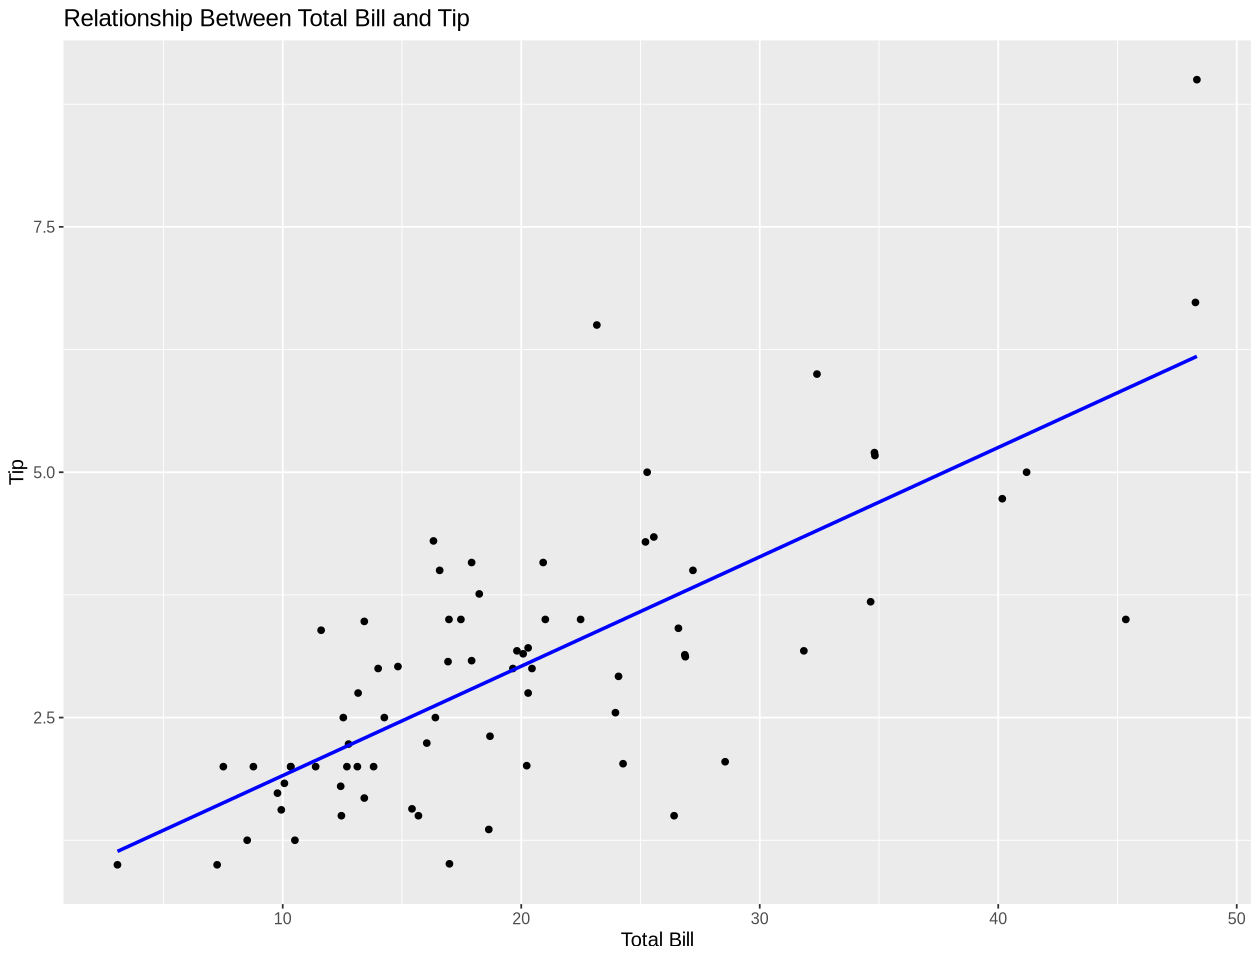

In [9]:
plot <- ggplot(tips_select, aes(x = total_bill, y = tip)) +
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE, color = "blue") + 
    labs(title = "Relationship Between Total Bill and Tip",
        x = "Total Bill",
        y = "Tip") +
    theme(text = element_text(size = 12))

plot

<font color = "darkblue">

##### Interpretation of results:
As seen from the analysis above, the chosen model unexpectedly ends up as a single linear regression with only one input variable, total bill, chosen. The adjusted R-squared is 0.539 which means the total bill is associated with about 54% of the variation in tip amount - a moderate association. The fact that only total bill was selected could mean potential multicollinearity with the other input variables or that there is a lack of strong relationships between the other input variables and the amount of tips given. To improve the strength of association and address model concerns, carrying out further data analysis (for example, exploring potential significant relationships between input variables through adding interaction terms in the model) as well as using a larger, more comprehensive dataset would be ideal. 

</font>